In [16]:
import numpy as np
from scipy.stats import entropy

def calculate_mutual_information(p_M, p_E_given_M):
    # Calculate joint probability
    p_E_M = np.outer(p_M, p_E_given_M)

    # Calculate marginal probability
    p_E = p_E_M.sum(axis=0)

    # Calculate mutual information
    I_M_E = entropy(p_E_M.flatten(), base=2) - entropy(p_M, base=2) - entropy(p_E, base=2)

    return I_M_E

# Define your probabilities here
p_M = np.array([0.5, 0.5])  # Example: [P(M=successful), P(M=unsuccessful)]
p_E_given_M = np.array([[0.8, 0.2],  # P(E=attained|M=successful), P(E=unattained|M=successful)
                        [0.2, 0.8]])  # P(E=attained|M=unsuccessful), P(E=unattained|M=unsuccessful)

# Calculate mutual information
I_M_E = calculate_mutual_information(p_M, p_E_given_M)
print(f"The mutual information I(M; E) is {I_M_E}")


The mutual information I(M; E) is 0.0


In [29]:
def calculate_mutual_information(p_M, p_E_given_M, epsilon=1e-10):
    # Add a small constant to the probabilities to avoid division by zero or log of zero
    p_M = p_M + epsilon
    p_E_given_M = p_E_given_M + epsilon

    # Normalize the probabilities so they sum to 1
    p_M = p_M / np.sum(p_M)
    p_E_given_M = p_E_given_M / np.sum(p_E_given_M, axis=1, keepdims=True)

    # Calculate joint probability
    p_E_M = np.outer(p_M, p_E_given_M)

    # Calculate marginal probability
    p_E = p_E_M.sum(axis=0)

    # Calculate mutual information
    I_M_E = entropy(p_E_M.flatten(), base=2) - entropy(p_M, base=2) - entropy(p_E, base=2)

    return I_M_E


In [21]:
from scipy.optimize import minimize

# Define your objective function (negative mutual information, since we want to maximize mutual information)
def objective_function(probabilities):
    p_M, p_E_given_M = probabilities[:2], probabilities[2:].reshape(2, 2)
    return -calculate_mutual_information(p_M, p_E_given_M)

# Initial guess for the probabilities
initial_guess = np.array([0.5, 0.5, 0.8, 0.2, 0.2, 0.8])

# Bounds for the probabilities (they must be between 0 and 1)
bounds = [(0, 1)] * 6

# Constraints for the probabilities (they must sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x[:2]) - 1},
               {'type': 'eq', 'fun': lambda x: np.sum(x[2:4]) - 1},
               {'type': 'eq', 'fun': lambda x: np.sum(x[4:6]) - 1})

# Run the optimization
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints)

# Extract the optimized probabilities
optimized_probabilities = result.x
p_M_optimized, p_E_given_M_optimized = optimized_probabilities[:2], optimized_probabilities[2:].reshape(2, 2)

print(f"The optimized probabilities are {p_M_optimized} and {p_E_given_M_optimized}.")


The optimized probabilities are [0.5 0.5] and [[0.8 0.2]
 [0.2 0.8]].


In [22]:
def calculate_probabilities(skill_level):
    # Define your probabilities as functions of the skill level
    p_M = np.array([skill_level, 1 - skill_level])  # P(M=successful) increases with skill level
    p_E_given_M = np.array([[skill_level, 1 - skill_level],  # P(E=attained|M=successful) increases with skill level
                            [1 - skill_level, skill_level]])  # P(E=attained|M=unsuccessful) decreases with skill level

    return p_M, p_E_given_M

# Define your skill level here (this could be a variable that changes over time)
skill_level = 0.6

# Calculate probabilities
p_M, p_E_given_M = calculate_probabilities(skill_level)

# Calculate mutual information
I_M_E = calculate_mutual_information(p_M, p_E_given_M)
print(f"The mutual information I(M; E) is {I_M_E}")


The mutual information I(M; E) is -2.220446049250313e-16


In [31]:
from scipy.special import kl_div

def calculate_mutual_information(p_M, p_E_given_M, epsilon=1e-10):
    # Add a small constant to the probabilities to avoid division by zero or log of zero
    p_M = p_M + epsilon
    p_E_given_M = p_E_given_M + epsilon

    # Normalize the probabilities so they sum to 1
    p_M = p_M / np.sum(p_M)
    p_E_given_M = p_E_given_M / np.sum(p_E_given_M, axis=1, keepdims=True)

    # Calculate joint probability
    p_E_M = np.outer(p_M, p_E_given_M)

    # Calculate marginal probability
    p_E = p_E_M.sum(axis=0)

    # Calculate mutual information using KL divergence to avoid log(0)
    I_M_E = np.sum(p_E_M * np.log2((p_E_M + epsilon) / (np.outer(p_M, p_E) + epsilon)))

    return I_M_E


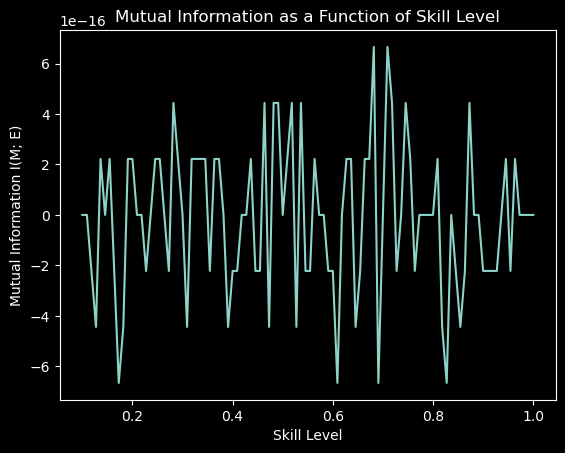

In [23]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

def calculate_mutual_information(p_M, p_E_given_M):
    # Calculate joint probability
    p_E_M = np.outer(p_M, p_E_given_M)

    # Calculate marginal probability
    p_E = p_E_M.sum(axis=0)

    # Calculate mutual information
    I_M_E = entropy(p_E_M.flatten(), base=2) - entropy(p_M, base=2) - entropy(p_E, base=2)

    return I_M_E

def calculate_probabilities(skill_level):
    # Define your probabilities as functions of the skill level
    p_M = np.array([skill_level, 1 - skill_level])  # P(M=successful) increases with skill level
    p_E_given_M = np.array([[skill_level, 1 - skill_level],  # P(E=attained|M=successful) increases with skill level
                            [1 - skill_level, skill_level]])  # P(E=attained|M=unsuccessful) decreases with skill level

    return p_M, p_E_given_M

# Define your skill levels here (this could be a variable that changes over time)
skill_levels = np.linspace(0.1, 1, 100)

# Calculate mutual information for each skill level
mutual_informations = []
for skill_level in skill_levels:
    p_M, p_E_given_M = calculate_probabilities(skill_level)
    I_M_E = calculate_mutual_information(p_M, p_E_given_M)
    mutual_informations.append(I_M_E)

# Plot mutual information as a function of skill level
plt.plot(skill_levels, mutual_informations)
plt.xlabel('Skill Level')
plt.ylabel('Mutual Information I(M; E)')
plt.title('Mutual Information as a Function of Skill Level')
plt.show()


In [20]:
# Define a threshold for the mutual information
threshold = 0.5  # This is just an example, you should choose a value that makes sense for your problem

def calculate_flow_state(p_M, p_E_given_M, threshold):
    # Calculate mutual information
    I_M_E = calculate_mutual_information(p_M, p_E_given_M)

    # If mutual information is high, the individual is likely in a flow state
    if I_M_E > threshold:
        return "FLOW"
    else:
        return "aint vibin"

# Calculate flow state
flow_state = calculate_flow_state(p_M, p_E_given_M, threshold)
print(f"The individual {flow_state}.")


The individual aint vibin.


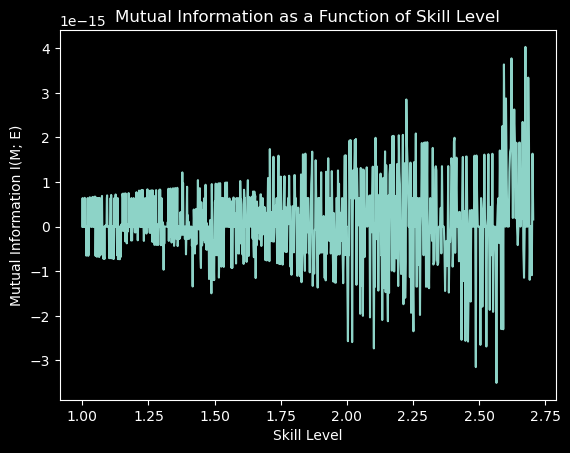

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the base for the exponential growth of the skill level
base = 1.01

# Define the time points at which to calculate the skill level and mutual information
time_points = np.linspace(0, 100, 1000)

# Calculate the skill level at each time point
skill_levels = base ** time_points

# Calculate mutual information for each skill level
mutual_informations = []
for skill_level in skill_levels:
    p_M, p_E_given_M = calculate_probabilities(skill_level)
    I_M_E = calculate_mutual_information(p_M, p_E_given_M)
    mutual_informations.append(I_M_E)

# Plot mutual information as a function of skill level
plt.plot(skill_levels, mutual_informations)
plt.xlabel('Skill Level')
plt.ylabel('Mutual Information I(M; E)')
plt.title('Mutual Information as a Function of Skill Level')
plt.show()


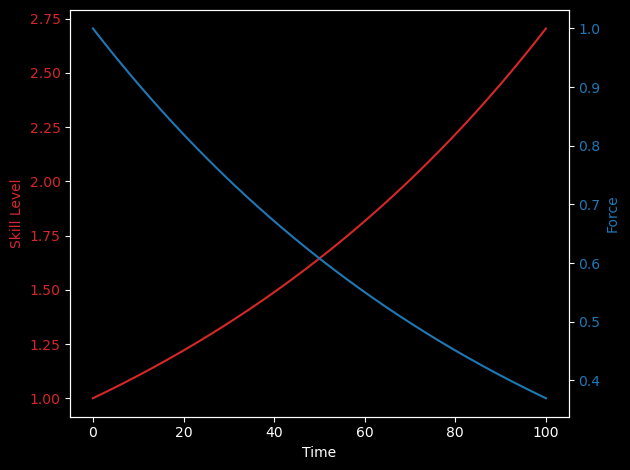

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the base for the exponential growth of the skill level
base = 1.01

# Define the time points at which to calculate the skill level and force
time_points = np.linspace(0, 100, 1000)

# Calculate the skill level at each time point
skill_levels = base ** time_points

# Define the force required to achieve a flow state as inversely proportional to the skill level
force = 1 / skill_levels

# Plot skill level and force over time
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Skill Level', color=color)
ax1.plot(time_points, skill_levels, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Force', color=color)
ax2.plot(time_points, force, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [12]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import entropy

def mutual_information(p_M, p_EjM):
    """
    Computes the mutual information I(M;E) between means M and ends E.

    Args:
        p_M (np.ndarray): Probabilities of observing each value of M.
        p_EjM (np.ndarray): Conditional probabilities of observing each value of E given each value of M.

    Returns:
        float: The mutual information I(M;E).
    """
    p_E = np.sum(p_EjM * p_M[:, np.newaxis], axis=0)
    p_EM = p_EjM * p_M[:, np.newaxis]

    H_M = entropy(p_M)
    H_EjM = entropy(p_EjM, axis=1, base=2)
    H_EjM_M = np.sum(p_M * H_EjM)

    I_ME = H_M - H_EjM_M
    return I_ME

def optimize_flow(n_M, n_E, constraints):
    """
    Optimizes the probability distributions p_M and p_EjM to maximize the mutual information I(M;E).

    Args:
        n_M (int): Number of possible values for M.
        n_E (int): Number of possible values for E.
        constraints (dict): Dictionary of constraints for p_M and p_EjM.

    Returns:
        tuple: Optimized probability distributions p_M and p_EjM.
    """
    def objective(x):
        p_M = x[:n_M]
        p_EjM = x[n_M:].reshape(n_E, n_M)
        return -mutual_information(p_M, p_EjM)

    def constraint(x):
        p_M = x[:n_M]
        p_EjM = x[n_M:].reshape(n_E, n_M)
        return np.concatenate([
            [1 - np.sum(p_M)],  # p_M(m) sums to 1
            [np.sum(p_EjM, axis=0) - 1],  # p_EjM(e|m) sums to 1 for each m
            constraints.get('p_M_bounds', np.zeros(n_M)),  # Optional bounds for p_M
            constraints.get('p_EjM_bounds', np.zeros((n_E, n_M))),  # Optional bounds for p_EjM
        ])

    x0 = np.random.rand(n_M + n_M * n_E)  # Initialize with random values
    x0[:n_M] /= np.sum(x0[:n_M])  # Normalize p_M
    x0[n_M:] /= (x0[n_M:].reshape(n_E, n_M).sum(axis=0)[np.newaxis, :] * np.ones(n_E))[:, np.newaxis]

    res = minimize(objective, x0, constraints={"fun": constraint, "jac": "2-point"})
    p_M_opt = res.x[:n_M]
    p_EjM_opt = res.x[n_M:].reshape(n_E, n_M)

    return p_M_opt, p_EjM_opt

In [15]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import entropy

def mutual_information(p_M, p_EjM):
    p_E = np.sum(p_EjM * p_M[:, np.newaxis], axis=0)
    p_EM = p_EjM * p_M[:, np.newaxis]

    H_M = entropy(p_M)
    H_EjM = entropy(p_EjM, axis=1, base=2)
    H_EjM_M = np.sum(p_M * H_EjM)

    I_ME = H_M - H_EjM_M
    return I_ME

def optimize_flow(n_M, n_E, constraints):
    def objective(x):
        p_M = x[:n_M]
        p_EjM = x[n_M:].reshape(n_E, n_M)
        mi = -mutual_information(p_M, p_EjM)
        mutual_info_values.append(mi)
        return mi

    def constraint(x):
        p_M = x[:n_M]
        p_EjM = x[n_M:].reshape(n_E, n_M)
        p_M_bounds = constraints.get('p_M_bounds', np.zeros(n_M))
        p_EjM_bounds = constraints.get('p_EjM_bounds', np.zeros((n_E, n_M)))

        return np.concatenate([
            [1 - np.sum(p_M)],
            [np.sum(p_EjM, axis=0) - 1],
            p_M - p_M_bounds,
            p_EjM.flatten() - p_EjM_bounds.flatten(),
        ])

    x0 = np.random.rand(n_M + n_M * n_E)
    x0[:n_M] /= np.sum(x0[:n_M])
    x0[n_M:] /= (x0[n_M:].reshape(n_E, n_M).sum(axis=0)[np.newaxis, :] * np.ones(n_E))[:, np.newaxis]

    mutual_info_values = []
    res = minimize(objective, x0, constraints={"fun": constraint, "jac": "2-point"}, callback=objective)
    p_M_opt = res.x[:n_M]
    p_EjM_opt = res.x[n_M:].reshape(n_E, n_M)

    return p_M_opt, p_EjM_opt, mutual_info_values

# Example usage
n_M = 3
n_E = 2
constraints = {
    'p_M_bounds': np.array([0.1, 0, 0.2]),
    'p_EjM_bounds': np.array([[0.2, 0.3], [0, 0.4], [0.1, 0]]),
}

p_M_opt, p_EjM_opt, mutual_info_values = optimize_flow(n_M, n_E, constraints)

# Plot the probability distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(range(n_M), p_M_opt, alpha=0.7, label='Optimized p_M')
axs[0].set_title('Optimized p_M')
axs[0].set_xticks(range(n_M))
axs[0].legend()

axs[1].bar(range(n_E), p_EjM_opt[:, 0], alpha=0.7, label='Optimized p_EjM(e|m=0)')
axs[1].bar(range(n_E), p_EjM_opt[:, 1], alpha=0.7, label='Optimized p_EjM(e|m=1)')
axs[1].bar(range(n_E), p_EjM_opt[:, 2], alpha=0.7, label='Optimized p_EjM(e|m=2)')
axs[1].set_title('Optimized p_EjM')
axs[1].set_xticks(range(n_E))
axs[1].legend()

plt.show()

# Plot the mutual information over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(mutual_info_values)), mutual_info_values)
plt.title('Mutual Information I(M;E) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mutual Information')
plt.show()

ValueError: operands could not be broadcast together with shapes (1,3) (2,) 

In [4]:
n_M = 3  # Number of possible values for M
n_E = 2  # Number of possible values for E

# Optional constraints for p_M and p_EjM
constraints = {
    'p_M_bounds': np.array([0.1, 0, 0.2]),  # Lower bounds for p_M
    'p_EjM_bounds': np.array([[0.2, 0.3], [0, 0.4], [0.1, 0]])  # Lower bounds for p_EjM
}

p_M_opt, p_EjM_opt = optimize_flow(n_M, n_E, constraints)

print("Optimized p_M:", p_M_opt)
print("Optimized p_EjM:")
print(p_EjM_opt)

ValueError: operands could not be broadcast together with shapes (6,) (1,3) (6,) 